# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Support Vector Machines

# Neural Networks

# Random under-sampling & random over-sampling

The most naive class of techniques for dealing with class imbalances is sampling. Random under-sampling involves removing some of the majority class samples at random until the dataset is balanced. Whereas random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced.

# SMOTE

SMOTE is a more sophisticated technique that generates synthetic samples for the minority class based on the characteristics of that class. This helps to balance the classes while preserving the information in the dataset.

# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [7]:
from sklearn.datasets import make_classification

def create_dataset(n_samples=100, weights=(0.01, 0.01, 0.98), n_classes=4,
                   class_sep=0.8, n_clusters=2):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

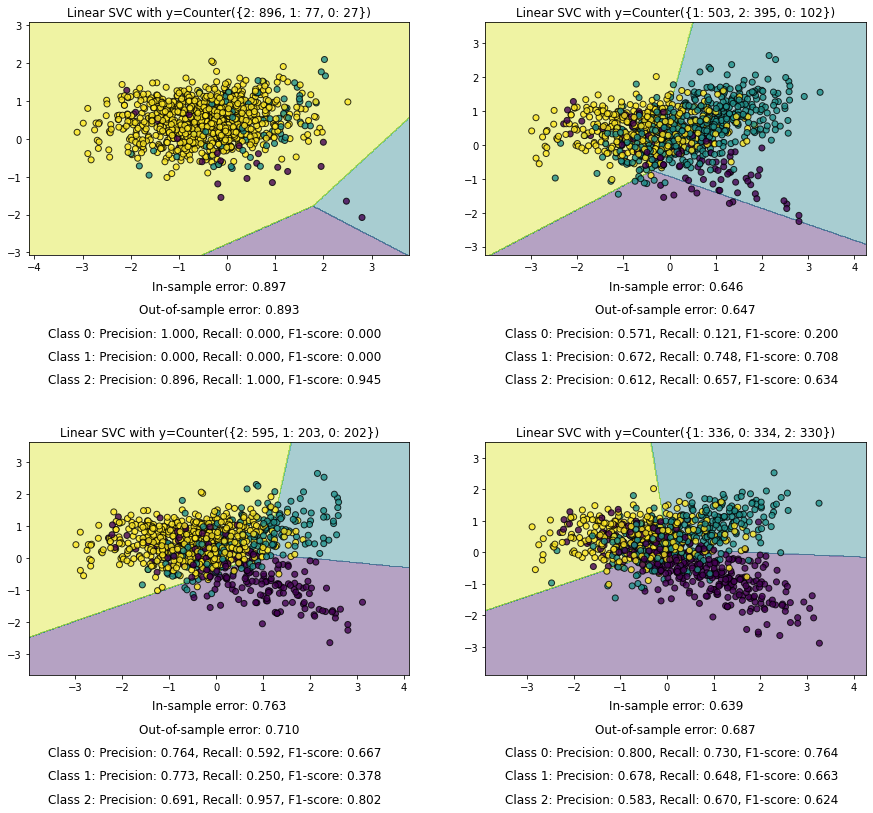

In [102]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support

def create_dataset(weights, n_samples=1000, n_classes=3,
                   class_sep=0.5, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.02, 0.07, 0.9), (0.1, 0.5, 0.8),
               (0.2, 0.2, 0.6), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights)
 
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


